<a href="https://colab.research.google.com/github/c-a-s-t-l-e/divine_text_analysis/blob/main/bom_footnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BoM Reference Extraction

**Objective**: Extract all references from the verses of the Book of Mormon and then place in a dataset for further study later.

In [1]:
!pip3 install requests beautifulsoup4

### Extract Superscripts for Just One Chapter

In [35]:
import csv
import requests
from bs4 import BeautifulSoup

# Define the URL for the verse page
url = "https://www.churchofjesuschrist.org/study/scriptures/bofm/1-ne/1?lang=eng"

# Send a request to the URL and get the content
response = requests.get(url)
content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(content, "html.parser")

# Find all the footnote references in the verse
footnote_refs = soup.find_all("a", class_="study-note-ref")

# Initialize an empty list to store the footnote data
footnote_data = []

# Iterate through each footnote reference and extract the link and footnote text
for footnote_ref in footnote_refs:
    footnote_link = footnote_ref["href"]
    footnote_marker = footnote_ref.find("sup", class_="marker")
    footnote_text = footnote_marker.get_text()

    # Extract the text after the superscript
    text_after_superscript = footnote_marker.next_sibling.string

    # Extract the verse number from the link and drop the letter
    verse_number = int(footnote_link.split("#")[-1][4:-1])

    # Append the footnote data to the list
    footnote_data.append([footnote_link, footnote_text, text_after_superscript, verse_number])

# Write the footnote data to a CSV file
with open("footnotes.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Link", "Footnote Marker", "Text After Superscript", "Verse Number"])
    writer.writerows(footnote_data)

### Extract Superscripts for Entire Book

In [42]:
import csv
import requests
from bs4 import BeautifulSoup

# Initialize an empty list to store the footnote data
footnote_data = []

# Iterate through each book, chapter, and verse in the Book of Mormon
for book in ["1-ne",]: # "2-ne",]: "jarom", "omni", "mosiah", "alma", "helaman", "3-ne", "4-ne", "mormon", "ether", "moroni"]:
    for chapter in range(1, 64):
        chapter_str = str(chapter)

        url = f"https://www.churchofjesuschrist.org/study/scriptures/bofm/{book}/{chapter_str}?lang=eng"

        # Send a request to the URL and get the content
        response = requests.get(url)
        content = response.content

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(content, "html.parser")

        # Find all the footnote references in the verse
        footnote_refs = soup.find_all("a", class_="study-note-ref")

        # Iterate through each footnote reference and extract the link and footnote text
        for footnote_ref in footnote_refs:
            footnote_link = footnote_ref["href"]
            footnote_marker = footnote_ref.find("sup", class_="marker")
            footnote_text = footnote_marker.get_text()

            # Extract the text after the superscript
            text_after_superscript = footnote_marker.next_sibling.string

            # Extract the verse number from the link and drop the letter
            verse_number = int(footnote_link.split("#")[-1][4:-1])

            # Append the footnote data to the list
            footnote_data.append([footnote_link, footnote_text, text_after_superscript, verse_number, chapter, book])

# Write the footnote data to a CSV file
with open("footnotes.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Link", "Footnote Marker", "Text After Superscript", "Verse Number", "Chapter", "Book"])
    writer.writerows(footnote_data)

In [46]:
import pandas as pd

df = pd.read_csv('/content/footnotes.csv')

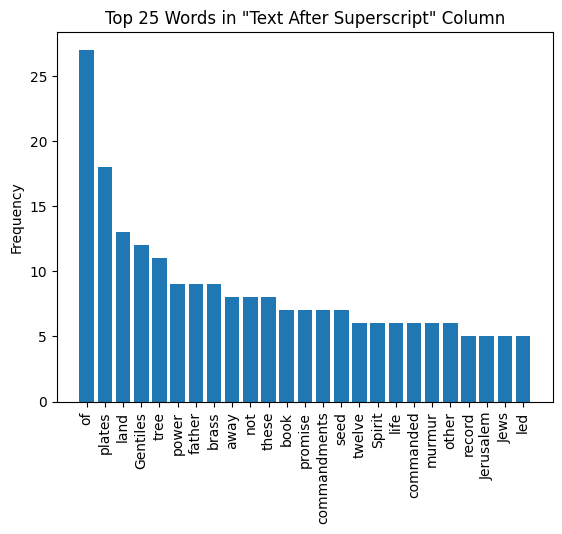

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df is your dataframe and it has been defined appropriately

text_series = df['Text After Superscript']
word_freq = Counter(text_series.str.cat(sep=' ').split())
word_freq_series = pd.Series(word_freq)
top_25_words = word_freq_series.nlargest(25)

# Create a bar graph with vertical x-axis labels
fig, ax = plt.subplots()
ax.bar(top_25_words.index, top_25_words.values)
ax.set_ylabel('Frequency')
ax.set_title('Top 25 Words in "Text After Superscript" Column')
plt.xticks(rotation=90)
plt.show()